# Introduction

Plotting routine for error mitigation studies.

See [linear_solver_errormitigation.py](linear_solver_errormitigation.py) for the actual implementation.

In [1]:
import numpy as np
from scipy.sparse import diags

from qiskit.quantum_info import state_fidelity

import time
import os
import pickle

import matplotlib.pyplot as plt

# Functions

In [2]:
def fidelity(qfunc, true):
    solution_qfun_normed = qfunc / np.linalg.norm(qfunc)
    solution_true_normed = true / np.linalg.norm(true)
    fidelity = state_fidelity(solution_qfun_normed, solution_true_normed)
    return fidelity

In [3]:
def get_results(fname):
    print(fname)
    with open(f'{fname}.pkl', 'rb') as file:
        data = pickle.load(file)
        # result = data['result']
        solution = data['counts_solution_vector']
        classical = data['classical_solution'].state
    counts_device = data['counts']
    counts_device = sorted(counts_device.items(), key=lambda x: str(x[0]))
    fidelity_device = fidelity(solution, classical)*100
    return counts_device, fidelity_device

# Problem setup

In [4]:
s = 10000
backend_method = 'simulator_statevector'
savedir = f'models'

# ## Sample 2x2 system
# nq = 1
# file_list = [                
#                 f"sample_HHL_errormitigation_circ-fullresults_nq{nq}_backend-{backend_method}_shots{s}_addnoise1_mitg0",
#                 f"sample_HHL_errormitigation_circ-fullresults_nq{nq}_backend-{backend_method}_shots{s}_addnoise1_mitg1",
#                 f"sample_HHL_errormitigation_circ-fullresults_nq{nq}_backend-{'ibm_nairobi'}_shots{s}_addnoise0_mitg0",
#                 f"sample_HHL_errormitigation_circ-fullresults_nq{nq}_backend-{'ibm_nairobi'}_shots{s}_addnoise0_mitg1",
#                 f"sample_HHL_errormitigation_circ-fullresults_nq{nq}_backend-{backend_method}_shots{s}_addnoise0_mitg0",
#             ]
# figfilename  = f'Figs/errormitigation_sampleHHL_sim_real'

## Sample Hele-Shaw flow case with 4 grid points
nq = 2
file_list = [               
                f"2DHS_HHL_fulldata_errormitigation_pressure_nx2_ny2_circ-fullresults_nq{nq}_backend-{backend_method}_shots{s}_addnoise1_mitg0",
                f"2DHS_HHL_fulldata_errormitigation_pressure_nx2_ny2_circ-fullresults_nq{nq}_backend-{backend_method}_shots{s}_addnoise1_mitg1",
                f"2DHS_HHL_fulldata_errormitigation_pressure_nx2_ny2_circ-fullresults_nq{nq}_backend-{'ibm_nairobi'}_shots{s}_addnoise0_mitg0",
                f"2DHS_HHL_fulldata_errormitigation_pressure_nx2_ny2_circ-fullresults_nq{nq}_backend-{'ibm_nairobi'}_shots{s}_addnoise0_mitg1",
                f"2DHS_HHL_fulldata_errormitigation_pressure_nx2_ny2_circ-fullresults_nq{nq}_backend-{backend_method}_shots{s}_addnoise0_mitg0",
            ]
figfilename  = f'Figs/errormitigation_2DHS_real'

In [5]:
legend_list = [
        "FakeNairobi",
        "FakeNairobi + M3",
        "ibm_nairobi",
        "ibm_nairobi + M3",
        "ideal",
    ]
color_list = ['tab:red', 
              'tab:green', 
              'tab:blue', 
              'tab:cyan', 
              'tab:grey', 
             ]
line_styles = ['--',
               ':', 
               '--', 
               ':', 
               '-']
# widths = [0.85, 0.45, 0.2]
widths = [0.85, 0.6, 0.45, 0.3, 0.2]

saveFig = False

In [6]:
n_shots = s

counts = []
fidelity_vals = []

In [7]:
## Uncomment the following to access data for the dynamic decoupling study. Please comment/edit the other input files accordingly.

# temp_filename = f"{savedir}/sample_HHL_errormitigation_circ-fullresults_nq{nq}_backend-{'ibm_mumbai'}_shots{s}_opt-dd.pkl"
# with open(temp_filename, 'rb') as file:
#     data = pickle.load(file)
#     result = data['result']

# for quasi_dist in result.quasi_dists:
#     counts_device = sorted(quasi_dist.binary_probabilities().items(), key=lambda x: str(x[0]))
#     counts += [counts_device, ]

In [8]:
i = 0
for file in file_list:
    savefilename = f'{savedir}/{file}'
    counts_device, fidelity_device = get_results(savefilename)
    counts += [counts_device,]
    fidelity_vals += [fidelity_device, ]
    i += 1

models/2DHS_HHL_fulldata_errormitigation_pressure_nx2_ny2_circ-fullresults_nq2_backend-simulator_statevector_shots10000_addnoise1_mitg0
models/2DHS_HHL_fulldata_errormitigation_pressure_nx2_ny2_circ-fullresults_nq2_backend-simulator_statevector_shots10000_addnoise1_mitg1
models/2DHS_HHL_fulldata_errormitigation_pressure_nx2_ny2_circ-fullresults_nq2_backend-ibm_nairobi_shots10000_addnoise0_mitg0
models/2DHS_HHL_fulldata_errormitigation_pressure_nx2_ny2_circ-fullresults_nq2_backend-ibm_nairobi_shots10000_addnoise0_mitg1
models/2DHS_HHL_fulldata_errormitigation_pressure_nx2_ny2_circ-fullresults_nq2_backend-simulator_statevector_shots10000_addnoise0_mitg0


In [9]:
# ## Use this cell to plot for Sample 2x2 case
# transparency = 1

# plt.rcParams.update({'font.size': 15})

# fig, ax = plt.subplots(figsize=(20, 5))
# for i, dataset in enumerate(counts):
#     x = [str(item[0]) for item in dataset]
#     y = [item[1] for item in dataset]
#     bars = ax.bar(x, y, color=color_list[i], alpha=transparency, width=widths[i], label=f"{legend_list[i]} ({fidelity_vals[i]:0.1f}%)", edgecolor='k')
#     # Set edge style for each bar
#     for bar in bars:
#         bar.set_linestyle(line_styles[i])

# ax.legend(loc='best', frameon=False);
# ax.set_xlabel('Qubit registers')  # Bitstring
# ax.set_ylabel('Quasi-probabilities')
# ax.set_ylim([0,0.6])
# # Extract unique keys while preserving order
# unique_keys = []
# for dataset in counts:
#     for item in dataset:
#         key = item[0]
#         if key not in unique_keys:
#             unique_keys.append(key)

# ax.set_xticks(range(len(unique_keys)))  # Set ticks positions
# ax.set_xticklabels(unique_keys, rotation=90)  # Set unique keys as labels
# ax.tick_params(axis='x', which='major', labelsize=15)

# fig.tight_layout()

# if saveFig:
#     plt.savefig(f"{figfilename}_dist.png", dpi=600)

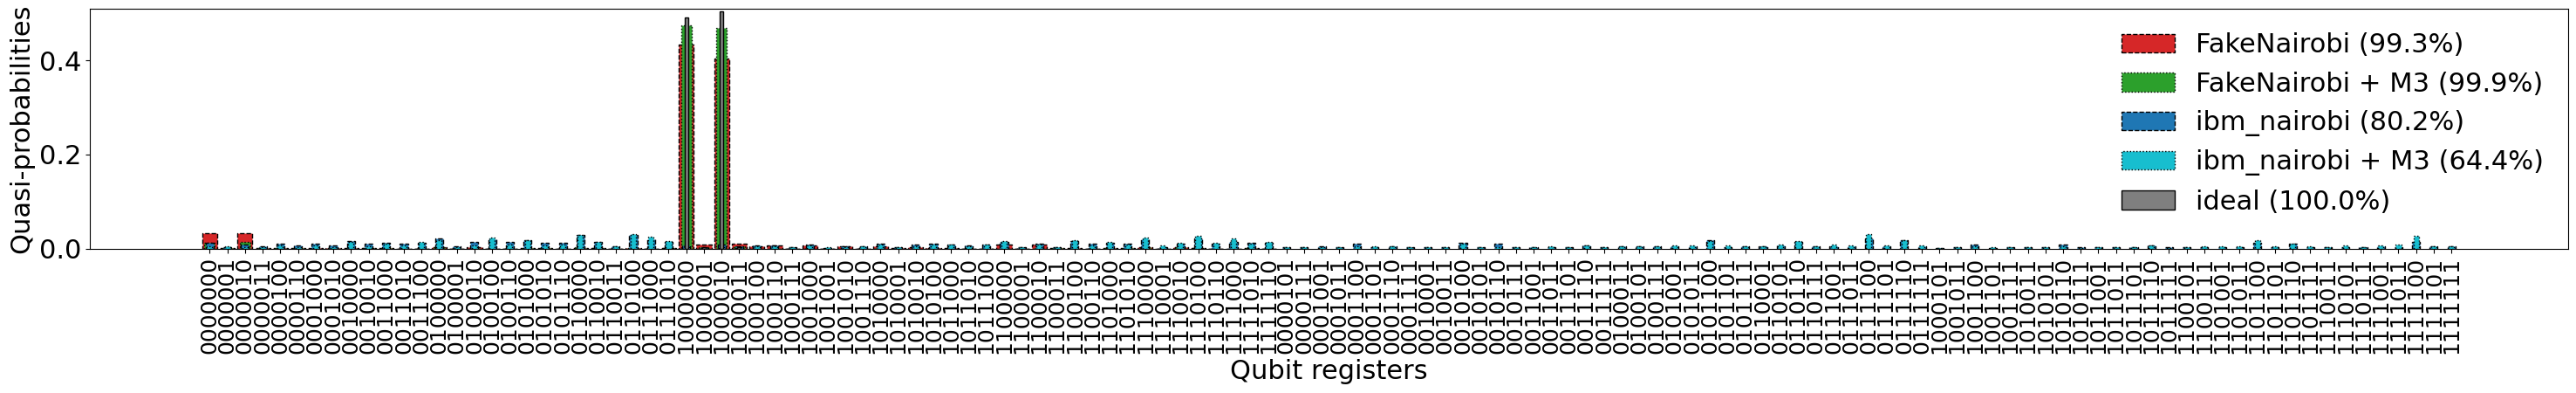

In [10]:
## Use this cell to plot for Hele-Shaw 4 grid case

transparency = 1

plt.rcParams.update({'font.size': 22})

fig, ax = plt.subplots(figsize=(30, 5))
for i, dataset in enumerate(counts):
    x = [str(item[0]) for item in dataset]
    y = [item[1] for item in dataset]
    bars = ax.bar(x, y, color=color_list[i], alpha=transparency, width=widths[i], label=f"{legend_list[i]} ({fidelity_vals[i]:0.1f}%)", edgecolor='k')
    # Set edge style for each bar
    for bar in bars:
        bar.set_linestyle(line_styles[i])

ax.legend(loc='best', frameon=False);
ax.set_xlabel('Qubit registers')  # Bitstring
ax.set_ylabel('Quasi-probabilities')
ax.set_ylim([0,0.51])
# Extract unique keys while preserving order
unique_keys = []
for dataset in counts:
    for item in dataset:
        key = item[0]
        if key not in unique_keys:
            unique_keys.append(key)

ax.set_xticks(range(len(unique_keys)))  # Set ticks positions
ax.set_xticklabels(unique_keys, rotation=90)  # Set unique keys as labels
ax.tick_params(axis='x', which='major', labelsize=18)

fig.tight_layout()

if saveFig:
    plt.savefig(f"{figfilename}_dist.png", dpi=600)